Pengolahan Data Lanjutan dengan Pandas

In [68]:
#Pd.concat
#Axis 1 = Horizontal , 0 = Vertical
print("Axis")
import pandas as pd
df1 = pd.DataFrame({ 'A': [1,2], 'B': [4,5]})
df2 = pd.DataFrame({ 'A': [7,8], 'B': [10,11]})
result  = pd.concat([df1, df2], axis=1)
print(result)
print("\n")

#Ignore_index true = mengabaikan index sedangkan false = tidak mengabaikan 
print("Ignore Index")
result = pd.concat([df1, df2], ignore_index=True)
print(result)
print("\n")
#Keys
print("Keys")
result = pd.concat([df1, df2], keys=["df1", 'df2'])
print(result)
print("\n")

#Multi-Level Index
print("Multi-Level Index")
result = pd.concat([df1,df2], keys=["df1","df2"], names=["Data","Nomor"]) 
print(result)

Axis
   A  B  A   B
0  1  4  7  10
1  2  5  8  11


Ignore Index
   A   B
0  1   4
1  2   5
2  7  10
3  8  11


Keys
       A   B
df1 0  1   4
    1  2   5
df2 0  7  10
    1  8  11


Multi-Level Index
            A   B
Data Nomor       
df1  0      1   4
     1      2   5
df2  0      7  10
     1      8  11


In [94]:
import pandas as pd

# DataFrame awal
df1 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value': [10, 11, 11]})
df2 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [10, 11, 11]})

# Merge menggunakan kolom 'key' dengan outer join => mempertahankan semua baris
result = pd.merge(df1, df2, on='key', how='outer')

# Ganti NaN dengan string kosong
result_filled = result.fillna("Kosong")

# Jika tidak ada kecocokan penuh, tampilkan DataFrame kosong
print(result_filled)

print("\n")
# Merge mengunakan kolom 'key' dengan inner join => hanya mempertahankan baris yang cocok
result_inner = pd.merge(df1, df2, on='key', how='inner')
print(result_inner)

print("\n")
#Merge Left Join 
print("Merge Left Join")
result = pd.merge(df1, df2, on='key', how='left')
print(result)

print("\n")
#Merge Right Join
print("Merge Right Join")
result = pd.merge(df1, df2, on='key', how='right')
print(result)
print("\n")


  key value_x value_y
0   A    10.0    10.0
1   B    11.0    11.0
2   C  Kosong    11.0
3   D    11.0  Kosong


  key  value_x  value_y
0   A       10       10
1   B       11       11


Merge Left Join
  key  value_x  value_y
0   A       10     10.0
1   B       11     11.0
2   D       11      NaN


Merge Right Join
  key  value_x  value_y
0   A     10.0       10
1   B     11.0       11
2   C      NaN       11




In [99]:
#Merge Indicator
print("Merge Indicator")
result = pd.merge(df1, df2, on='key', how='left', indicator=True)
print(result)

#Merge Penggambungann
d3 = pd.DataFrame({'key1': ['A', 'B', 'C'], 'value': [10, 11, 11]})
d4 = pd.DataFrame({'key2': ['A', 'B', 'D'], 'value': [10, 11, 11]})
result = pd.merge(d3, d4, how='outer', left_on='key1', right_on='key2')
print(result)






Merge Indicator
  key  value_x  value_y     _merge
0   A       10     10.0       both
1   B       11     11.0       both
2   D       11      NaN  left_only
  key1  value_x key2  value_y
0    A     10.0    A     10.0
1    B     11.0    B     11.0
2    C     11.0  NaN      NaN
3  NaN      NaN    D     11.0


Latihan Soal Concat dan Merge

In [128]:
#Latihan Soal 1: Merge - Inner Join
import pandas as pd

#Menggunakan Merge Inner Join
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4],
    'Salary': [50000, 60000, 70000]
})
merge_df = pd.merge(df1,df2, on='ID', how='inner')
print(merge_df)
print("\n")
#Latihan Soal 2: Merge - Left Join
merge_df2 = pd.merge(df1,df2, on='ID', how='left')
print(merge_df2)
print("\n")

#Latihan Soal 3: Merge - Outer Join dengan Indikator
merge_df3 = pd.merge(df1,df2, on='ID', how='outer', indicator=True)
print(merge_df3)
print("\n")

#Latihan Soal 8: Merge dengan Beberapa Kolom sebagai Kunci
df3 = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'State': ['NY', 'CA', 'IL'],
    'Population': [8000000, 4000000, 2700000]
})

df4 = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Houston'],
    'State': ['NY', 'CA', 'TX'],
    'GDP': [1000000, 500000, 200000]
})

merge_df = pd.merge(df3,df4, on=['City', 'State'], how='outer')
print(merge_df)
print("\n")

#Latihan Soal 9: Merge dengan Suffixes untuk Kolom Sama
df1 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['Alice', 'Bob'],
    'Age': [25, 30]
})

df2 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['Charlie', 'David'],
    'Age': [35, 40]
})
merge_df = pd.merge(df1,df2, on='ID', how='outer', suffixes=('_df1', '_df2'))
print(merge_df)
print("\n")

#Latihan Soal 10: Merge dengan Kolom yang Tidak Ada di Kedua DataFrame
df1 = pd.DataFrame({
    'Product': ['A', 'B', 'C'],
    'Price': [100, 200, 300]
})

df2 = pd.DataFrame({
    'Product': ['A', 'B', 'D'],
    'Stock': [50, 60, 70]
})
merge_df= pd.merge(df1,df2, on='Product', how='outer')
print(merge_df)


   ID     Name  Age  Salary
0   2      Bob   30   50000
1   3  Charlie   35   60000


   ID     Name  Age   Salary
0   1    Alice   25      NaN
1   2      Bob   30  50000.0
2   3  Charlie   35  60000.0


   ID     Name   Age   Salary      _merge
0   1    Alice  25.0      NaN   left_only
1   2      Bob  30.0  50000.0        both
2   3  Charlie  35.0  60000.0        both
3   4      NaN   NaN  70000.0  right_only


          City State  Population        GDP
0      Chicago    IL   2700000.0        NaN
1      Houston    TX         NaN   200000.0
2  Los Angeles    CA   4000000.0   500000.0
3     New York    NY   8000000.0  1000000.0


   ID Name_df1  Age_df1 Name_df2  Age_df2
0   1    Alice       25  Charlie       35
1   2      Bob       30    David       40


  Product  Price  Stock
0       A  100.0   50.0
1       B  200.0   60.0
2       C  300.0    NaN
3       D    NaN   70.0


In [142]:
#Latihan Soal 4: Concat - Menggabungkan Secara Vertikal
import pandas as pd
df1 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['Alice', 'Bob'],
    'Age': [25, 30]
})

df2 = pd.DataFrame({
    'ID': [3, 4],
    'Name': ['Charlie', 'David'],
    'Age': [35, 40]
})
merge_df = pd.concat([df1,df2], axis=0)
print(merge_df)
print("\n")

#Latihan Soal 5: Concat - Menggabungkan Secara Horizontal
df1 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['Alice', 'Bob']
})

df2 = pd.DataFrame({
    'Age': [25, 30],
    'Salary': [50000, 60000]
})

merge_df = pd.concat([df1,df2], axis=1)
print(merge_df)
print("\n")

#Latihan Soal 7: Concat dengan Index yang Berbeda
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Age': [25, 30]
}, index=['a', 'b'])

df2 = pd.DataFrame({
    'Name': ['Charlie', 'David'],
    'Age': [35, 40]
}, index=['c', 'd'])
merge_df = pd.concat([df1,df2])
print(merge_df)
print("\n")


   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
0   3  Charlie   35
1   4    David   40


   ID   Name  Age  Salary
0   1  Alice   25   50000
1   2    Bob   30   60000


      Name  Age
a    Alice   25
b      Bob   30
c  Charlie   35
d    David   40




Latihan Soal Matematika Disktrik

Rata - Rata Performa : 6.7


Performa karyawan yang berada di tengah daftar adalah : 6.5


Sebagian besar karyawan memiliki performa pada angka: 0    6
Name: Performa, dtype: int64


Range performa karyawan adalah antara 3 hingga 10.


Simpangan baku dari performa karyawan adalah: 2.16


Variansi performa karyawan menunjukkan seberapa besar penyebaran nilai performa: 4.68


Rentang performa karyawan antara 25% dan 75% menunjukkan variasi nilai performa yang lebih umum: 2.00


Skewness dari performa karyawan menunjukkan seberapa konsisten nilai performa: -0.26


Kurtosis dari performa karyawan menunjukkan seberapa tidak normal nilai performa: -0.41


Cewek memiliki performa yang lebih besar dibuktikan dengan : 36


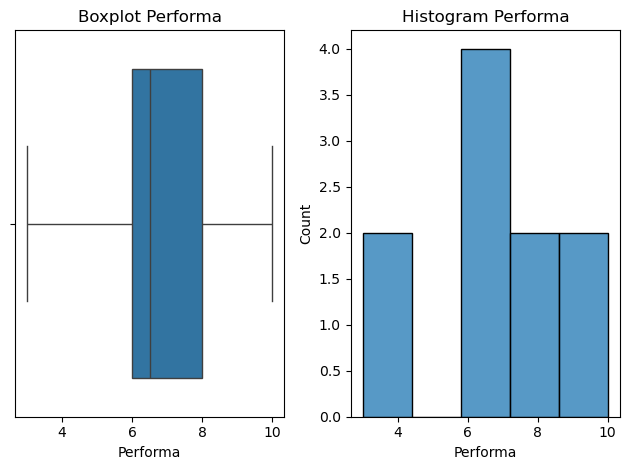

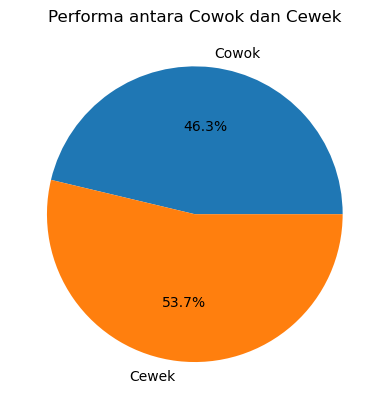

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Belum  = {'Nama' : ["Andi", "Budi","Citra","Dita","Eka","Fajar","Gita","Hadi","Intan","Joko"],
        'Performa' : [8,6,9,6,7,4,10,3,8,6]
        }
cowok = ["Andi","Budi","Eka","Fajar","Joko"]
cewek = ["Citra","Dita","Gita","Hadi","Intan"]

data = pd.DataFrame(Belum)

#Rata - rata Performa
mean = data['Performa'].mean()
print(f"Rata - Rata Performa : {mean}") 
print("\n")
#Median Performa
median = data['Performa'].median()
print(f"Performa karyawan yang berada di tengah daftar adalah : {median}")
print("\n")

#Modus Performa
modus = data['Performa'].mode()
print(f"Sebagian besar karyawan memiliki performa pada angka: {modus}")
print("\n")

#Range Performa
print(f"Range performa karyawan adalah antara {data['Performa'].min()} hingga {data['Performa'].max()}.")
print("\n")

#Simpang Baku
std = data['Performa'].std()
print(f"Simpangan baku dari performa karyawan adalah: {std:.2f}")
print("\n")

#Variansi Performa
var = data['Performa'].var()
print(f"Variansi performa karyawan menunjukkan seberapa besar penyebaran nilai performa: {var:.2f}")
print("\n")

#Interquartille Range (IQR)
q1 = data['Performa'].quantile(0.25)
q3 = data['Performa'].quantile(0.75)
iqr = q3 - q1
print(f"Rentang performa karyawan antara 25% dan 75% menunjukkan variasi nilai performa yang lebih umum: {iqr:.2f}")
print("\n")

#Kemencengan (skewness)
skew = data['Performa'].skew()
print(f"Skewness dari performa karyawan menunjukkan seberapa konsisten nilai performa: {skew:.2f}")
print("\n") 

#Kuortosis
kurt = data['Performa'].kurt()
print(f"Kurtosis dari performa karyawan menunjukkan seberapa tidak normal nilai performa: {kurt:.2f}")
print("\n")

#Melihat Data Karyawan antara Cowok / cewk yang rata bekerja besar
cowok_data = data[data['Nama'].isin(cowok)]
cewek_data = data[data['Nama'].isin(cewek)]
sum_cowok = cowok_data['Performa'].sum()
sum_cewek = cewek_data['Performa'].sum()
if sum_cowok > sum_cewek:
    print("Cowok memiliki performa yang lebih besar dibuktikan dengan :", sum_cowok)
else:
    print("Cewek memiliki performa yang lebih besar dibuktikan dengan :", sum_cewek)
#Visualisasi
# Boxplot untuk melihat penyebaran performa
plt.subplot(1,2,1)  # 1 baris, 2 kolom, plot pertama
sns.boxplot(x=data['Performa'])
plt.title('Boxplot Performa')

# Histogram untuk melihat distribusi performa
plt.subplot(1,2,2)  # 1 baris, 2 kolom, plot pertama
sns.histplot(data['Performa'], kde=False)
plt.title('Histogram Performa')
plt.tight_layout()
plt.show()

#Piegram untuk melihat seberapa besar antara cowok dan cewek
plt.pie([sum_cowok, sum_cewek], labels=['Cowok', 'Cewek'], autopct='%1.1f%%')
plt.title('Performa antara Cowok dan Cewek')
plt.show()





Masuk Latihan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset Penjualan Produk
data_penjualan = {
    'Produk': ['A', 'B', 'C', 'D', 'E'],
    'Harga': [20000, 15000, 30000, 10000, 25000],
    'Terjual': [50, 80, 40, 100, 60],
    'Diskon (%)': [10, 5, 15, 0, 20]
}

df_penjualan = pd.DataFrame(data_penjualan)

#Total Pendapatan Tiap Produk - Hitung pendapatan masing-masing produk sebelum dan sesudah diskon serta mevisualisasikan
df_penjualan['Pendapatan Sebelum Diskon'] = df_penjualan['Harga'] * df_penjualan['Terjual']
df_penjualan['Pendapatan Setelah Diskon'] = (df_penjualan['Harga'] - (df_penjualan['Harga'] * df_penjualan['Diskon (%)'] / 100)) * df_penjualan['Terjual']
print(df_penjualan)

#Produk dengan Penjualan Terbanyak dan Terkecil
penjualan_terbesar = df_penjualan.loc[df_penjualan['Pendapatan Sebelum Diskon'].idxmax()]
penjualan_terkecil = df_penjualan.loc[df_penjualan['Pendapatan Sebelum Diskon'].idxmin()]
print("Penjualan terbesar pada : \n",penjualan_terbesar)
print("\n")
print("Penjualan terkecil pada : \n",penjualan_terkecil)


  Produk  Harga  Terjual  Diskon (%)  Pendapatan Sebelum Diskon  \
0      A  20000       50          10                    1000000   
1      B  15000       80           5                    1200000   
2      C  30000       40          15                    1200000   
3      D  10000      100           0                    1000000   
4      E  25000       60          20                    1500000   

   Pendapatan Setelah Diskon  
0                   900000.0  
1                  1140000.0  
2                  1020000.0  
3                  1000000.0  
4                  1200000.0  
Penjualan terbesar pada : 
 Produk                               E
Harga                            25000
Terjual                             60
Diskon (%)                          20
Pendapatan Sebelum Diskon      1500000
Pendapatan Setelah Diskon    1200000.0
Name: 4, dtype: object


Penjualan terkecil pada : 
 Produk                              A
Harga                           20000
Terjual             